*Created by: Ilma Amira*

# <mark> Capstone Project: Webscrapping using BeautifulSoup 💫 </mark>

This notebook was developed as one of the capstone projects from [Algoritma Data Science School](https://algorit.ma/): **Data Analytics Specialization**. It contains guidances and steps to do a simple webscrapping using BeautifulSoup. The expected deliverable from this project is doing a simple webscrapping to get information and insights.

Webscrapping is actually one of the methods to collect data from the internet. In this notebook, we will try to do a webscrapping, show the scrap results, and make some visualizations. In order to pull this off, we need a couple default library from Python, BeautifulSoap, and matplotlib. Without further ado, let's get started! 💞

## Make a Virtual Environment

Creating virtual environment is a very important step in working on a project. A virtual environment is a Python environment such that the Python interpreter, libraries, and scripts installed into it are isolated from those installed in other virtual environments. 

But you might ask: why do we need virtual environment?

We need virtual environment to:
- Isolate package versions to avoid breaking changes ⚠️
- Sharing virtual environment to enable project collaboration 👷
- Publishing or deploying an application which requires certain environment 💻

And you might also ask: how to create virtual environment?

Kindly check these steps! 😉
1. Open your Anaconda Prompt
2. Make a virtual environment and named it as `ENV_NAME`:
   ```
   conda create -n <ENV_NAME> python=<PYTHON_VERSION>
   ```
   Example: `conda create -n capstone_da python=3.9`


3. Activate your virtual environment:
   ```
   conda activate <ENV_NAME>
   ```
   Example: `conda activate capstone_da`
   
   
4. Install kernel into your virtual environment:
   ```
   pip install ipykernel
   python -m ipykernel install --user --name=<ENV_NAME>
   ```
Congrats! Your virtual environment is ready to use! 😍

## Dependencies 

Before we proceed into the next step, we must check again whether we have installed these libraries:
- [ ] beautifulsoup4
- [ ] pandas
- [ ] matplotlib

> If you haven't installed those libraries, you must install with `pip install <LIBRARY_NAME>` 

**OR**

> Import *requirements_from_capstone_da.txt* with `pip install --user -r requirements_from_capstone_da.txt`. ❗**Make sure you are in the correct path** ❗

## Case Background 

In this project, we will try to scrap the historical data of Ethereum trading volume from CoinGecko site. CoinGecko is a site that provides the historical data and fundamental analysis of the cryptocurrencies. Ethereum, as the most popular cryptocurrency after Bitcoin, can be a beautiful target to analyze and discuss.

A lot of you might ask why we need to scrap data from the site, while it already has a good enough visualization. Let's say that you have task to make a forecast. To do that, you need to look at the data pattern that went before. In other words, you need to have the historical data, right? So, webscrapping is an effective way to collect them. 

Never heard about forecasting? Keep calm, you don't need to worry about it. Because in this notebook, we mainly discuss about webscrapping. But, in additional, we will also try to take insight from simple visualizations. The data that we use is Ethereum trading volume (in U.S. Dollar) from January 1, 2020 to June 30, 2021, hence we will take two points from the site, namely `Date` and `Volume`. See the original data in [here](https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel).

❗ *Disclaimer: we will scrap this CoinGecko site for educational purpose only.* ❗

## What is BeautifulSoup? 

BeautifulSoup is a Python library for pulling data out of HTML and XML files. Since BeautifulSoup used to pull the data out of a HTML, we need to pull out the HTML first. How do we do it? We will use other library `request`. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `.get()` method.


In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly we get from the `request.get`, we can use `.content`. In here, I slice the result so it won't make our screen full. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see, we get very unstructured and complex HTML, which actually contains the codes needed to show the webpages on our web browser. But, a human will confused what and where we can use that piece of code. So, to cope with it, here we will use the BeautifulSoup. BeautifulSoup will transform a complex HTML document into a complex tree of Python objects. 

Let's make BeautifulSoup object and feel free to explore the object here 💞

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

See how our BeautifulSoup looks like! The content is the same with our `url_get` object but it's tidier.

In [4]:
print(soup.prettify())[:500]

<!DOCTYPE html>
<html lang="en">
 <head>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
    <script>
     (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7');
    </script>
    <link cross

TypeError: 'NoneType' object is not subscriptable

## Finding the Right Key to Scrap the Data & Extracting the Right Information

Currently, we already have a tidier HTML. Next, we should get the right key to scrap the data. In order to so, we should search the line that we want to use. Look at our CoinGecko site first.

<img src="images/coingecko web.jpg">

The information that we need are the daily trading volume, which contain in the table (`Date` and `Volume` columns). To know which part of the key refer to those columns, just move our cursor to the table > right click > inspect the element. Then, we will see something like this.

<img src="images/coingecko inspect.jpg">

From inspect result, we need to find the line that refers to specific table we want. In this case, we need to pull the data with `table table-striped text-sm text-lg-normal` class. To do so, we can use the `.find()` method at our BeautifulSoup object. Let's also call the object to see what we get.

In [5]:
table = soup.find('table', attrs = {'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


As we can see, the `.find()` method helps us to get the part of the HTML code we need.

Now, we only need to get the contents of `Date` and `Volume` columns. How do we do that? We can refer to the HTML code above. Look at it closely and you will find that the `Date` is contained within `th` with `font-semibold text-center` and `Volume` is contained within `td` with `text-center`.

> The other useful method from BeautifulSoup is `.find_all()`. While the `.find()` method is used for finding out the **first tag** with the specified name or id, and returning it as an object of bs4. The `.find_all()` method is used for finding out **all tags** with the specified tag name or id, and returning them as a list of bs4.

Let's see the code below 💞

In [6]:
row = table.find_all('th', attrs = {'font-semibold text-center'})

`row` is a list which contains all date information. However, in this case, those information aren't enough for you, because you need two information: `Date` and `Volume`. Since we need more information, we will make looping. Before that, we must know the length of our data with code below.

> You actually can extract the information manually, but if the information you need are too long, you better to use loop.

In [7]:
row_length = len(row)
row_length

547

After we know the length of our data, we will do the looping process.

Here what the looping do to scrap the information: 😉 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of of our data: find all cell of the columns which contain `Date` and `Volume` and use `.text` to get only text information.
- Then we will append it to our tuple that we prepared before.
- In every one iteration, we will scrap one line of the table.  

Notes: 
- The date information are contained in cell one, cell two, cell three, ... of table.find_all('th', attrs = {'font-semibold text-center'})
- The trading volume information are contained in cell one, cell five (1+4), cell nine (5+4), cell thirteen (9+4), ... of table.find_all('td', attrs = {'text-center'})

In [8]:
temp = [] #initiating a list

j = 1

for i in range(0, row_length):
    #get period
    period = table.find_all('th', attrs = {'font-semibold text-center'})[i].text
    period = period.strip() #to remove excess whitespace
    
    #get volume
    volume = table.find_all('td', attrs = {'text-center'})[j].text
    volume = volume.strip() #to remove excess whitespace
    j += 4 

    temp.append((period,volume))
    
temp 

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

Notice that the list above gives us reversed information. To make analysis easier, let's reverse our list.

In [9]:
temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

After we fix the order, finally our list is ready to input into a dataframe 😍

## Creating Dataframe & Data Wrangling

Put the list into dataframe

In [10]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','volume'))
df.head()

,period,volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


Let's check the data types in our dataframe to see if our data are useable.

In [11]:
df.dtypes

period    object
volume    object
dtype: object

To create a visualization, the data types seem mismatched. Therefore, we have to clean it up. 

The cleaning steps:
1. Change `period` into `datetime64` type
2. Set `period` as index to make our plot behaves as we want
3. Remove the `$` in `volume`
4. Remove the `,` in `volume`
5.  Change `volume` into `int64` type

In [12]:
df['period'] = df['period'].astype('datetime64')

In [13]:
df = df.set_index('period')

In [14]:
df['volume'] = df['volume'].str.replace("$","")

C:\Users\TESTUSER\AppData\Local\Temp\ipykernel_37576\900387891.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace("$","")


In [15]:
df['volume'] = df['volume'].str.replace(",","")
df['volume'] = df['volume'].astype('int64')

Double Check! 😄

In [16]:
df.dtypes

volume    int64
dtype: object

Wow!! Our dataframe is ready! 💯💯

Proceed to visualization 😁

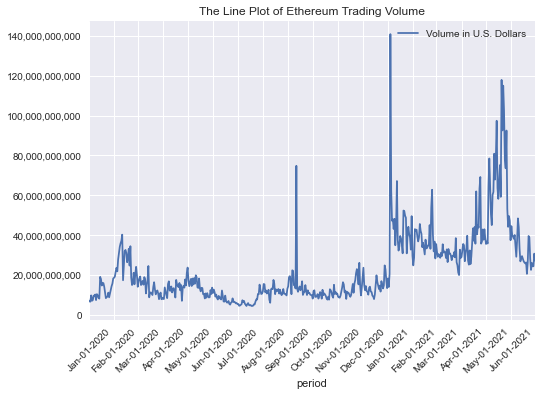

In [17]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('seaborn')
ax = df.plot(title = 'The Line Plot of Ethereum Trading Volume', rot = 45)
ax.legend(['Volume in U.S. Dollars'])
loc = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b-%d-%Y')
ax.xaxis.set_major_formatter(fmt)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

📈 Insights:
- Ethereum trading volume started to increase since January 4, 2021. From the report, it said that the first hal of 2021 had been one of the most active periods on record for Ethereum as there were many user adoptions, trading activities, and price hikes.
- There are some unusual movements of Ethereum trading volume, especially in September 11, 2020 and January 4, 2021. This is allegedly caused by a spike in the Ethereum price.

To detect the outliers more clearly, let's use boxplot!

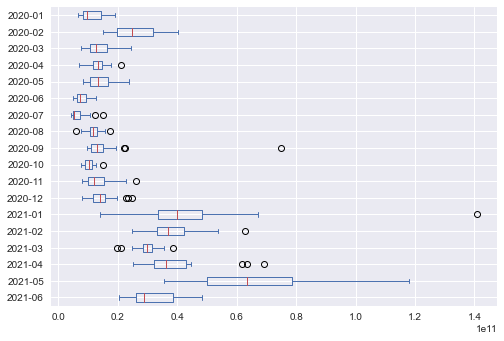

In [18]:
df1 = df.copy()
df1 = df1.reset_index()
df1['yearmonth'] = df1['period'].dt.to_period('M')
df1['day'] = df1['period'].dt.day
df1 = df1.pivot(index = 'day',columns = 'yearmonth', values = 'volume')
df1.plot(kind = 'box',vert=False).invert_yaxis()

📈 Insights:

From the boxplot above, it can be seen that there are significant outliers in September 2020 and January 2021. Hence, these periods have become important for us to investigate what might have happened at that time and whether they affected our analysis.

After you make visualizations, you can also implement the scrapping to one function and put it at the flask webapp (see the image below for the example).

<img src="images/flask app.jpg">


## Conclusion

We already at the end of this notebook. From what we have done above, we already:
1. Perform webscrapping: requesting the data, creating a BeautifulSoap, finding the right key, and extracting the information
2. Insert the scrap results into a dataframe
3. Perform data wrangling
4. Make simple visualizations and take insights

As you can look at the steps before, after we have all the data we need from the scrapping results, we can move on to the next part of the project (using Pandas or other libraries). Webscrapping is very useful if we don't have sufficient data in the databases or local computer.

> Even when you don't have a direct access to the data from a website, you can always do the scrapping method. There is a couple libraries that can do the same task (ex: `scrapy`) and build bot to automatically crawl data.